In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import mean

In [144]:
df=pd.read_csv("housing.csv",header=None, delimiter=r"\s+",names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [145]:
X=df.drop(labels=['MEDV'], axis=1)
y=df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25) 

In [146]:
min_err=0
err=[]
deg=[]

for i in range(1,10):

  poly = PolynomialFeatures(i,include_bias=True)
  X_train_tr=poly.fit_transform(X_train)
  X_test_tr=poly.transform(X_test)
  X_val_tr=poly.transform(X_val)

  lm = LinearRegression()
  lm.fit(X_train_tr,y_train)
  y_pred_test = lm.predict(X_test_tr)
  y_pred_val=lm.predict(X_val_tr)
  # if mean_squared_error(y_val,y_pred_val) < min_err:
  err.append(mean_squared_error(y_val,y_pred_val))
  deg.append(i)

    
min_err=min(err) 


print("mse error: " + str(min_err) +" with deg of : " + str(deg[np.argmin(min_err)]))


mse error: 27.053230706966154 with deg of : 1


In [147]:
poly = PolynomialFeatures(1,include_bias=True)
X_train_tr=poly.fit_transform(X_train)
X_test_tr=poly.transform(X_test)
X_val_tr=poly.transform(X_val)

lm = LinearRegression()
lm.fit(X_train_tr,y_train)
y_pred_test = lm.predict(X_test_tr)
mse=mean_squared_error(y_test,y_pred_test)
print("mse error: " + str(mse))

mse error: 15.562688558830544


In [148]:
print(r2_score(y_test, y_pred_test))

0.7696099252637325


In [149]:
# List to maintain the different cross-validation scores

min_err=0
er_val=[]
er_train=[]
deg=[]

# List to maintain the different values of alpha
alpha = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]

# Loop to compute the different values of cross-validation scores
for i in alpha:
   poly = PolynomialFeatures(1,include_bias=True)
   X_train_tr=poly.fit_transform(X_train)
   X_test_tr=poly.transform(X_test)
   X_val_tr=poly.transform(X_val)

   ridgeModel = Ridge(alpha = i)
   ridgeModel.fit(X_train_tr,y_train)
   y_pre_val=ridgeModel.predict(X_val_tr)
   y_pre_train=ridgeModel.predict(X_train_tr)
   er_val.append(mean_squared_error(y_val,y_pre_val))
   er_train.append(mean_squared_error(y_train,y_pre_train))
   

    
min_err=min(er_val) 


print("mse error: " + str(min_err) +" with alpha of : " + str(alpha[np.argmin(min_err)]))

print(ridgeModel.score(X_test_tr, y_test))



mse error: 27.05323070696615 with alpha of : 0
0.7617603316619438


In [150]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 0)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))


0.7696099252637318


In [ ]:
# fig, ax=plt.subplots()
# ax.plot(alpha,er_train, '-b', label='Train')
# ax.plot(alpha,er_val, '-r', label='Validation')
# plt.xlabel('alpha')
# plt.ylabel('Cost Function')
# legend=ax.legend();

In [152]:
# List to maintain the different cross-validation scores
cross_val_scores_lasso = []
min_err=0
er_val_lasso=[]
er_train_lasso=[]

deg=[]

# List to maintain the different values of alpha
Lambda = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]

# Loop to compute the different values of cross-validation scores
for i in Lambda:
   lassoModel = Lasso(alpha = i)
   lassoModel.fit(X_train_tr,y_train)
   y_pre_val_lasso=lassoModel.predict(X_val_tr)
   y_pre_train_lasso=ridgeModel.predict(X_train_tr)
   er_val_lasso.append(mean_squared_error(y_val,y_pre_val_lasso))
   er_train_lasso.append(mean_squared_error(y_train,y_pre_train_lasso))
  

    
min_err=min(er_val_lasso) 


print("mse error: " + str(min_err) +" with deg of : " + str(Lambda[np.argmin(min_err)]))

print(lassoModel.score(X_test_tr, y_test))



mse error: 27.053230706966115 with deg of : 0
0.5826827284934959


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.457e+03, tolerance: 2.408e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_re

In [153]:
lassoModelChosen = Lasso(alpha = 0)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(lassoModelChosen.score(X_test, y_test))


0.7696099252637321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.457e+03, tolerance: 2.408e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [ ]:
# fig, ax=plt.subplots()
# ax.plot(alpha,er_train_lasso, '-b', label='Train')
# ax.plot(alpha,er_val_lasso, '-r', label='Validation')
# plt.xlabel('alpha')
# plt.ylabel('Cost Function')
# legend=ax.legend();

In [155]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [lm.score(X_test_tr, y_test),
		ridgeModelChosen.score(X_test, y_test),
		lassoModelChosen.score(X_test, y_test)]

# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = lm.score(X_test_tr, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

# Printing the scores for different models
for key, val in mapping.items():
	print(str(key)+' : '+str(val))


Linear Regression : 0.7696099252637325
Ridge Regression : 0.7696099252637318
Lasso Regression : 0.7696099252637321


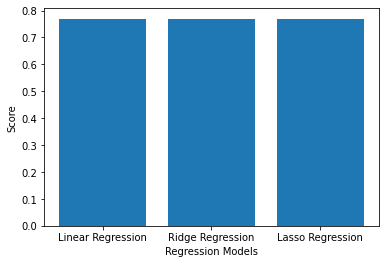

In [156]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()
